In [2]:
file_path = 'bbc-news-sample.csv'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix

In [4]:
sns.set_style('darkgrid')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
bbc_df = pd.read_csv(file_path, sep='\t')

In [9]:
bbc_df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [10]:
bbc_df.iloc[2]['content']


' The owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (£479m) loan.  State-owned Rosneft bought the Yugansk unit for $9.3bn in a sale forced by Russia to part settle a $27.5bn tax claim against Yukos. Yukos\' owner Menatep Group says it will ask Rosneft to repay a loan that Yugansk had secured on its assets. Rosneft already faces a similar $540m repayment demand from foreign banks. Legal experts said Rosneft\'s purchase of Yugansk would include such obligations. "The pledged assets are with Rosneft, so it will have to pay real money to the creditors to avoid seizure of Yugansk assets," said Moscow-based US lawyer Jamie Firestone, who is not connected to the case. Menatep Group\'s managing director Tim Osborne told the Reuters news agency: "If they default, we will fight them where the rule of law exists under the international arbitration clauses of the credit."  Rosneft officials were unavailable for comment. But the c

In [11]:
bbc_df.category.value_counts()

,count
category,
sport,511
business,510
politics,417
tech,401
entertainment,386


In [12]:
bbc_df.isnull().sum()

,0
category,0
filename,0
title,0
content,0


In [13]:
import nltk
nltk.download('stopwords') # stopwords are filler/irrelavent words like is, of, a, it etc which are not important for predicting the category of news article
# eg: if we have a word like exchange we can think of stocks, exchange rates etc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
stopwords = set(stopwords.words('english')) # set as its faster for processing

In [15]:
set(list(stopwords)[0:15])

{'before',
 "don't",
 'each',
 'had',
 'haven',
 'he',
 'himself',
 "it'd",
 "it's",
 'myself',
 'no',
 'our',
 'so',
 'was',
 'your'}

In [16]:
len(stopwords)

198

In [17]:
# so we remove the total no of stopwords, that way our model get trained appropriately only on correct remaining words

import re # -  Regular Expression, and it's a built-in Python module used for pattern matching and text manipulation.

cleaned_content = []
for content in bbc_df.content.dropna():
  content = re.findall(r'\b\w+\b', content.lower())  # removes the punctuation and lower case
  cleaned_content.append(' '.join([word for word in content if word not in stopwords]))

In [18]:
bbc_df['content_clean'] = np.array(cleaned_content)

In [19]:
bbc_df.iloc[0]['content_clean']

'quarterly profits us media giant timewarner jumped 76 1 13bn 600m three months december 639m year earlier firm one biggest investors google benefited sales high speed internet connections higher advert sales timewarner said fourth quarter sales rose 2 11 1bn 10 9bn profits buoyed one gains offset profit dip warner bros less users aol time warner said friday owns 8 search engine google internet business aol mixed fortunes lost 464 000 subscribers fourth quarter profits lower preceding three quarters however company said aol underlying profit exceptional items rose 8 back stronger internet advertising revenues hopes increase subscribers offering online service free timewarner internet customers try sign aol existing customers high speed broadband timewarner also restate 2000 2003 results following probe us securities exchange commission sec close concluding time warner fourth quarter profits slightly better analysts expectations film division saw profits slump 27 284m helped box office 

In [20]:
len(bbc_df.content_clean[2000]) # checking iof our length of the content is good enough

1751

Text(0, 0.5, 'Count')

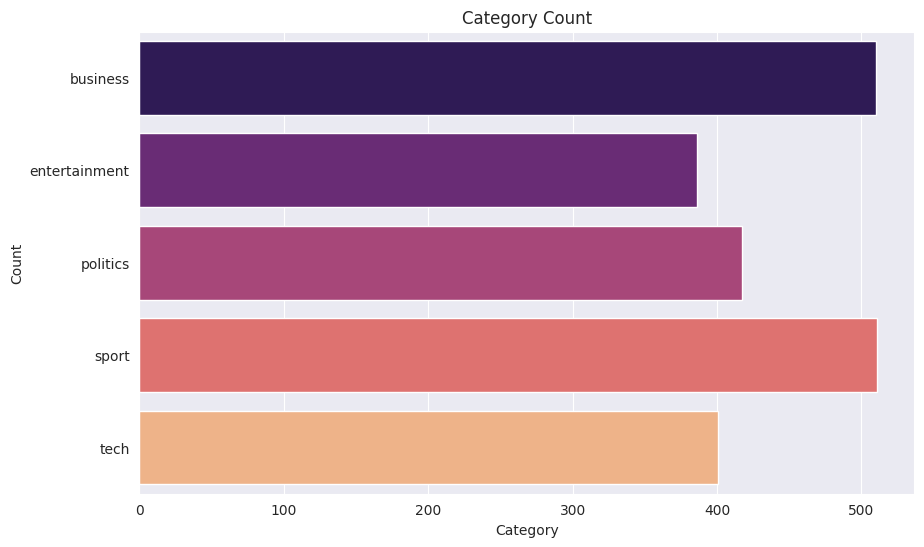

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(bbc_df.category, palette='magma')
plt.title('Category Count')
plt.xlabel('Category')
plt.ylabel('Count')


In [22]:
#plot the word cloud - words that are important for specific category
!pip install wordcloud

In [23]:
from wordcloud import WordCloud, STOPWORDS # stopwords again but we need this as word cloud might have different set of words
# might not be 100% compatible so we bring it here again as nlp might have different set of words

# most imp words in the title for new article to represent it category
title_business = ' '.join(bbc_df[bbc_df['category'] == 'business']['title'])

title_entertainment = ' '.join(bbc_df[bbc_df['category'] == 'entertainment']['title'])

title_politics = ' '.join(bbc_df[bbc_df['category'] == 'politics']['title'])

title_tech = ' '.join(bbc_df[bbc_df['category'] == 'tech']['title'])

title_sport = ' '.join(bbc_df[bbc_df['category'] == 'sport']['title'])

# title_business = bbc_df[bbc_df['category'] == 'business']['title']
# collapse = title_business.str.cat(sep=' ')
#

In [24]:
# CREATE stopword list
stopwords = set(STOPWORDS)

wordcloud for Business!


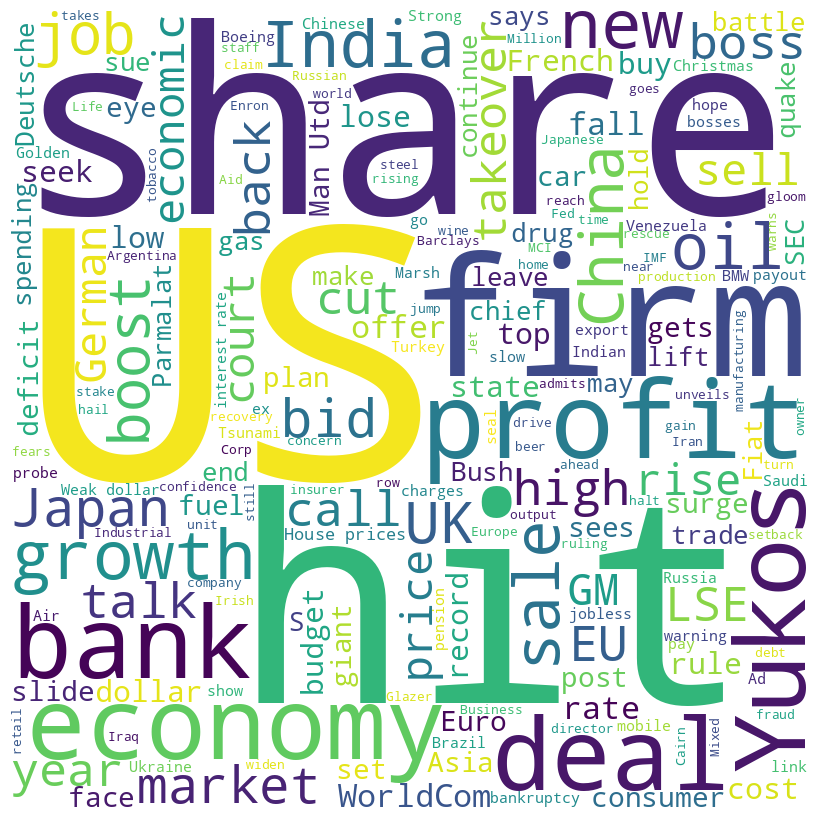

wordcloud for Entertainment!


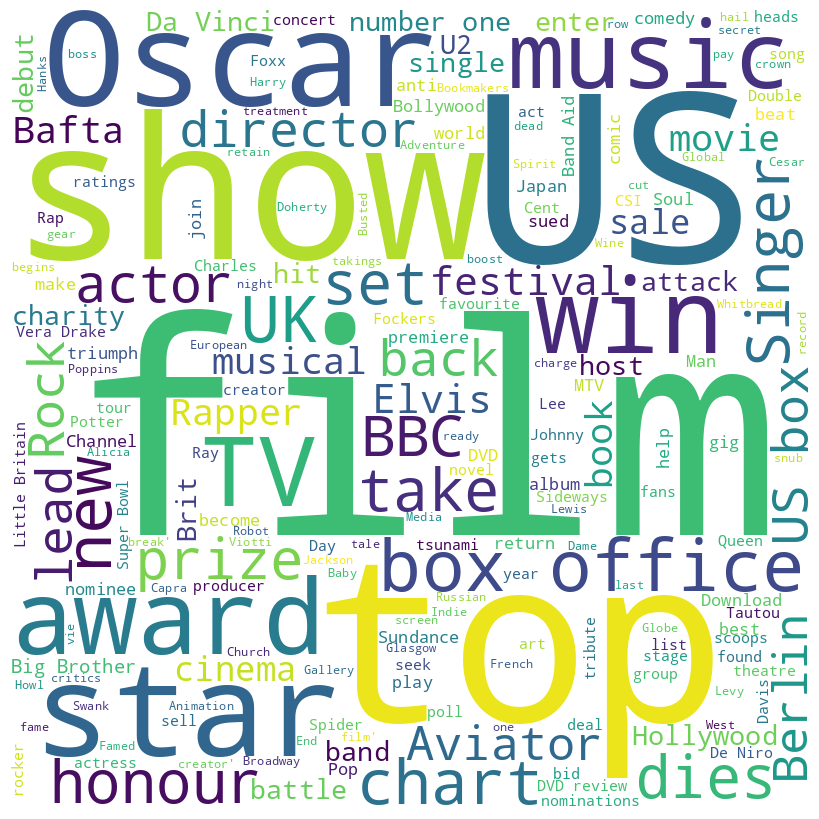

wordcloud for Politics!


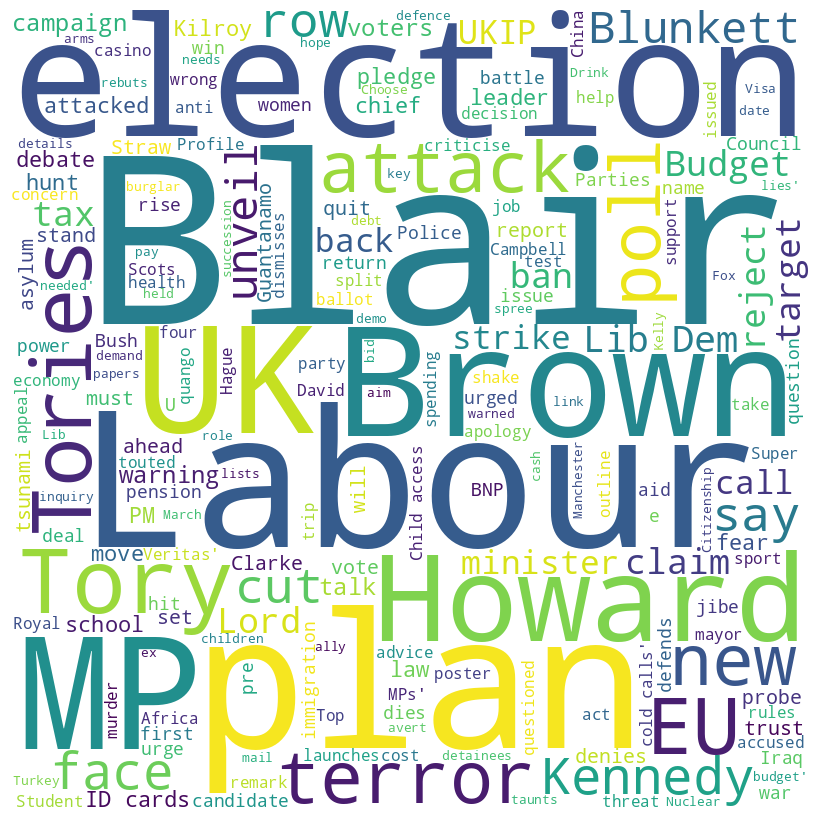

wordcloud for Tech!


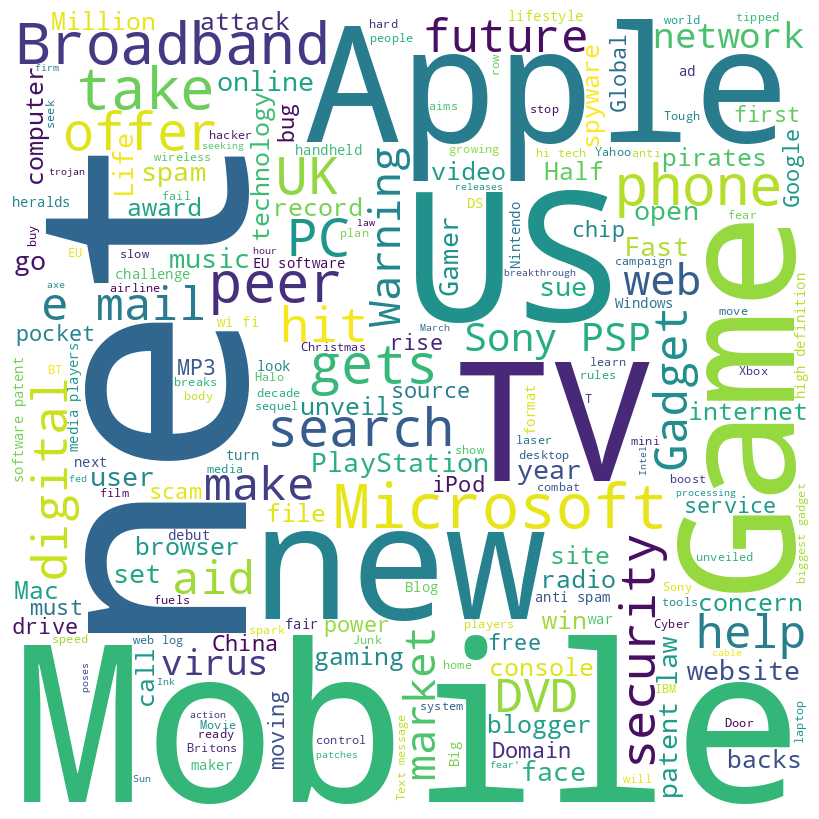

wordcloud for Sport!


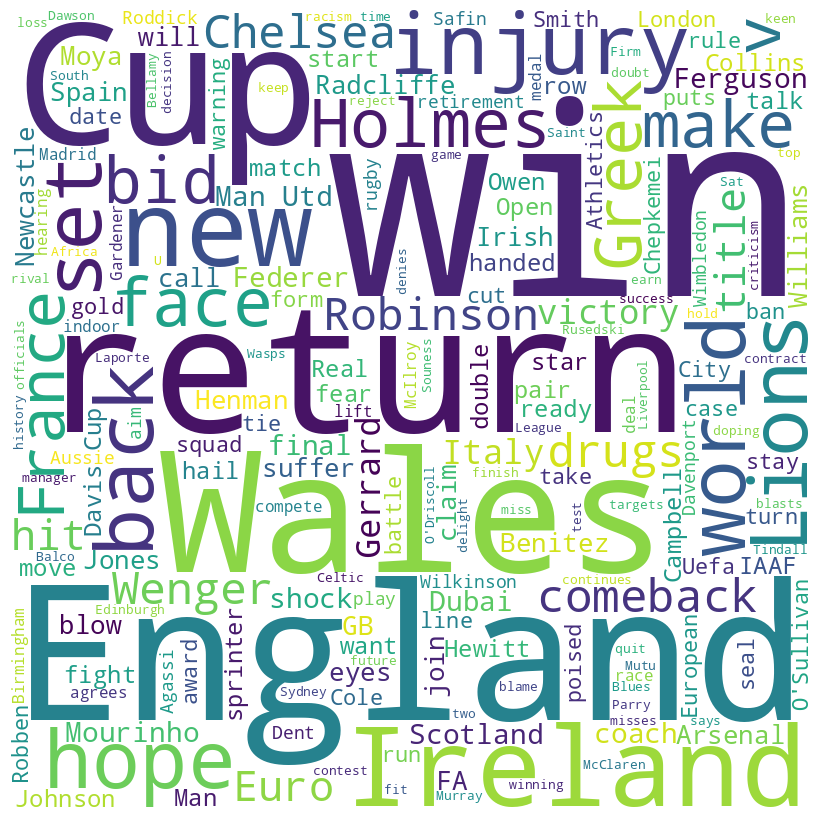

In [25]:
# wordcloud for business
print('wordcloud for Business!')
wordcloud_business = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(title_business)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_business)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# wordcloud for entertainment
print('wordcloud for Entertainment!')

wordcloud_entertainment = WordCloud(width=800, height = 800,
                                    background_color='white',
                                    stopwords = stopwords,
                                    min_font_size = 10).generate(title_entertainment)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_entertainment)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# wordcloud for politics
print('wordcloud for Politics!')

wordcloud_politics = WordCloud(width=800, height = 800,
                                    background_color='white',
                                    stopwords = stopwords,
                                    min_font_size = 10).generate(title_politics)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_politics)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# wordcloud for tech
print('wordcloud for Tech!')

wordcloud_tech = WordCloud(width=800, height= 800,
                           background_color='white',
                           stopwords = stopwords,
                           min_font_size = 10).generate(title_tech)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_tech)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# wordcloud for sport
print('wordcloud for Sport!')
wordcloud_sport = WordCloud(width=800, height= 800,
                           background_color='white',
                           stopwords = stopwords,
                           min_font_size= 10).generate(title_sport)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_sport)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Train the model to prediction what category the content belongs to :


In [26]:
X = list(bbc_df.content_clean)
y = list(bbc_df.category)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)
# Shuffles data before splitting to avoid bias from ordering


In [28]:
# check if training data have balance set
unique_train_Set = np.unique(y_train, return_counts=True)
unique_train_Set
#

(array(['business', 'entertainment', 'politics', 'sport', 'tech'],
       dtype='<U13'),
 array([395, 314, 341, 409, 321]))

In [29]:
#check if testing data have a balance set
unique_test_Set = np.unique(y_test, return_counts= True)
unique_train_Set

(array(['business', 'entertainment', 'politics', 'sport', 'tech'],
       dtype='<U13'),
 array([395, 314, 341, 409, 321]))

In [30]:
print(len(X_train)) # check how much is available for test and train dataset
print(len(X_test))
print(len(y_train))
print(len(y_test))

1780
445
1780
445


In [31]:

vocab_size = 15000
embedding_dim = 32
max_length = 256
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'   # out of vocab words to handle them
# these are some basic parameters to specify before converting words into number

In [32]:
# convert text data into numbers - Transform Article Text into Feature Vectors
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) # tokenizer coverts words into numbers gives unique no.to each unique word
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [33]:
# apply padding so that all words are of same length and convert number to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [34]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
#

In [35]:
# we need to also do for category labels as they are also texts
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(bbc_df.category)
label_index = label_tokenizer.word_index # mapping each word to its unique integer index

In [36]:
y_train_sequences = np.array(label_tokenizer.texts_to_sequences(y_train))
y_test_sequences = np.array(label_tokenizer.texts_to_sequences(y_test))
# list of single-item lists, so wrapped in np.array(...) to get: 2d array


In [37]:
# lets check first 15 elements in the word_index dictionary
dict(list(word_index.items())[0:15])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'one': 9,
 'us': 10,
 'could': 11,
 'last': 12,
 'first': 13,
 'two': 14,
 'time': 15}

In [38]:
label_index

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

MODEL:


In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(), # average the embedding vectors
    tf.keras.layers.Dense(128, activation='relu'), # 128 neural networks that are decision makers
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss = amount of mistake that model is making
# optimizer = helps model to learn quickly
# metrics = checking for accuracy
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
num_epochs = 35 # no. of training rounds for the model
history = model.fit(X_train_padded, y_train_sequences, epochs=num_epochs, validation_data=(X_test_padded, y_test_sequences), verbose=2)

Epoch 1/35
56/56 - 2s - 44ms/step - accuracy: 0.3904 - loss: 1.6421 - val_accuracy: 0.6067 - val_loss: 1.4974
Epoch 2/35
56/56 - 0s - 7ms/step - accuracy: 0.5697 - loss: 1.3542 - val_accuracy: 0.6315 - val_loss: 1.1753
Epoch 3/35
56/56 - 1s - 11ms/step - accuracy: 0.7927 - loss: 0.9346 - val_accuracy: 0.8562 - val_loss: 0.7797
Epoch 4/35
56/56 - 1s - 11ms/step - accuracy: 0.9371 - loss: 0.5189 - val_accuracy: 0.9146 - val_loss: 0.4558
Epoch 5/35
56/56 - 1s - 10ms/step - accuracy: 0.9775 - loss: 0.2708 - val_accuracy: 0.9551 - val_loss: 0.2885
Epoch 6/35
56/56 - 1s - 12ms/step - accuracy: 0.9899 - loss: 0.1514 - val_accuracy: 0.9596 - val_loss: 0.2146
Epoch 7/35
56/56 - 1s - 10ms/step - accuracy: 0.9944 - loss: 0.0943 - val_accuracy: 0.9596 - val_loss: 0.1776
Epoch 8/35
56/56 - 1s - 11ms/step - accuracy: 0.9983 - loss: 0.0629 - val_accuracy: 0.9573 - val_loss: 0.1642
Epoch 9/35
56/56 - 1s - 11ms/step - accuracy: 0.9989 - loss: 0.0451 - val_accuracy: 0.9618 - val_loss: 0.1442
Epoch 10/35

In [41]:
y_predict = model.predict(X_test_padded)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [42]:
X_test_padded

array([[   19,   277,   269, ...,     0,     0,     0],
       [  111,   529,   622, ...,     0,     0,     0],
       [   37,   489, 11096, ...,     0,     0,     0],
       ...,
       [  482,   384,    85, ...,     0,     0,     0],
       [    8,   498,   367, ...,     0,     0,     0],
       [    1,   476,   158, ...,     0,     0,     0]], dtype=int32)

In [43]:
y_predict

array([[2.0275537e-09, 3.3743515e-08, 9.9999779e-01, 6.5309450e-07,
        1.5471805e-06, 4.9247313e-09],
       [6.9723086e-08, 5.7134557e-06, 9.9995095e-01, 3.4942263e-05,
        8.1522867e-06, 7.6810025e-08],
       [1.3141052e-06, 9.9985886e-01, 8.5384316e-05, 2.4175963e-05,
        9.0138752e-07, 2.9364215e-05],
       ...,
       [8.0662108e-09, 1.6953255e-06, 5.0443719e-05, 9.9994278e-01,
        1.4797670e-06, 3.6562114e-06],
       [1.3646626e-07, 1.0081702e-06, 1.8599319e-06, 2.4540077e-06,
        3.2494668e-04, 9.9966955e-01],
       [1.2708028e-08, 6.5985537e-04, 9.9795580e-01, 7.8292313e-04,
        3.6663143e-04, 2.3468617e-04]], dtype=float32)

In [44]:
# decode numbers back to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_content(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

reverse_label_index = dict([(value, key) for (key, value) in label_index.items()])
def decode_label(text):
    if isinstance(text, (int, np.integer)):  # Check if input is a single integer
        return reverse_label_index.get(text, '?')
    else:  # Assume input is an iterable
        return ' '.join([reverse_label_index.get(i, '?') for i in text])

In [45]:
decode_content(X_test_padded[421])

'prime minister <OOV> life jacket joined school children <OOV> <OOV> sought sell party education policies tony blair <OOV> across lake <OOV> <OOV> visit education secretary ruth kelly back school outings mr blair later stressed labour election pledge focus education met parents area conservatives lib dems say pledges worthless parties stepping campaigning ahead general election widely expected held 5 may mr blair looking little <OOV> joined two girls st <OOV> middle school <OOV> <OOV> trip <OOV> <OOV> closely followed boat full photographers afterwards said outdoor activities beneficial children accepted lots teachers worried taking part fear sued something went wrong introducing simple guidelines teachers follow going risk legal action mr blair said types activities got exercise common sense obviously situation parents teachers end worried going subject sorts legal action take children <OOV> outdoor activity actually good kids good health character pledge education child achieving one

In [46]:
decode_label(y_test_sequences[421])

'politics'

In [47]:
decode_label(y_predict[421].argmax())
#

'politics'